<a href="https://colab.research.google.com/github/salimmoulouel/pyspark_recipes/blob/main/pyspark/Analyse_donn%C3%A9es_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BDLE TP1 avec colab

## Initialisation

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
import os

# choisir un mode d'execution: colaboratory ou local ou ppti

# IL FAUT LANCER JUPYTER NOTEBOOK EN LOCAL ET CHOISIR ENVIRONNEMENT HEBERGE EN HAUT A DROITE
EXECUTION='colaboratory'


# IL FAUT LANCER JUPYTER NOTEBOOK EN LOCAL ET CHOISIR ENVIRONNEMENT LOCAL EN HAUT A DROITE
# 
# Assurez-vous que l'extension jupyter_http_over_ws Jupyter est activée et à jour sur votre machine.
# pip install --upgrade jupyter_http_over_ws>=0.0.1a3 && jupyter serv e port 8888 et qu'il accepte les requêtes du site https://colab.research.google.com.
# jupyter notebook   --NotebookApp.allow_origin='https://colab.research.google.com'   --port=8888   --NotebookApp.port_retries=0
# voir aussi https://research.google.com/colaboratory/local-runtimes.html
# 
#EXECUTION='local'

# EXECUTION EN SALLE PPTI
#EXECUTION='ppti'

print('EXECUTION', EXECUTION)

SPARK_VERSION="2.4.4"

if EXECUTION == 'colaboratory':
  HOME="/content"
  DATASET_DIR="/content"
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  #os.environ["SPARK_HOME"] = f"{HOME}/spark-{SPARK_VERSION}-bin-hadoop2.7"
  os.environ["SPARK_HOME"] = "{}/spark-{}-bin-hadoop2.7".format(HOME, SPARK_VERSION)

elif EXECUTION == 'local':
  HOME=os.environ["HOME"]
  DATASET_DIR="{}/dataset".format(HOME)
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  #os.environ["SPARK_HOME"] = f"{HOME}/anaconda3/bin/spark-{SPARK_VERSION}-bin-hadoop2.7"
  os.environ["SPARK_HOME"] = "{}/anaconda3/bin/spark-{}-bin-hadoop2.7".format(HOME, SPARK_VERSION)

elif EXECUTION == 'ppti':
  HOME=os.environ["HOME"]
  DATASET_DIR="/Infos/bd/spark/dataset"
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  os.environ["SPARK_HOME"] = "/usr/local/spark-{}-bin-hadoop2.7".format(SPARK_VERSION)
else:
    print("Valeur incorrecte pour la variable EXECUTION:", EXECUTION)


print('JAVA_HOME:', os.environ["JAVA_HOME"] )
print('SPARK_HOME:', os.environ["SPARK_HOME"])
print('DATASET_DIR:', DATASET_DIR)
print('HOME:', HOME)

EXECUTION colaboratory
JAVA_HOME: /usr/lib/jvm/java-8-openjdk-amd64
SPARK_HOME: /content/spark-2.4.4-bin-hadoop2.7
DATASET_DIR: /content
HOME: /content


## Téléchargements (effectuer une fois si nécessaire / ne pas effectuer en salle PPTI)

---



### Télécharger Spark

In [ ]:
if EXECUTION == 'colaboratory':
  CLOSER_LOCATION = "https://www.apache.org/dyn/closer.lua/spark/spark-{}/spark-{}-bin-hadoop2.7.tgz".format(SPARK_VERSION, SPARK_VERSION)
  # !wget http://mirror.ibcp.fr/pub/apache/spark/spark-{SPARK_VERSION}/spark-{SPARK_VERSION}-bin-hadoop2.7.tgz
  !wget {CLOSER_LOCATION} -O suggest.html
  !wget `grep "suggest the following mirror" -A2 suggest.html |grep -Po 'href="\K[^"]*'` -O spark-{SPARK_VERSION}-bin-hadoop2.7.tgz
  !tar xzf spark-{SPARK_VERSION}-bin-hadoop2.7.tgz
  !rm spark-{SPARK_VERSION}-bin-hadoop2.7.tgz
  !rm suggest.html
  !echo "spark installé dans spark-{SPARK_VERSION}-bin-hadoop2.7"
else:
  print("on ne telecharge pas spark")

# Rmq: une autre méthode possible pour télécharger spark: est :  !pip install pyspark

--2019-10-10 12:24:54--  https://www.apache.org/dyn/closer.lua/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
Resolving www.apache.org (www.apache.org)... 40.79.78.1, 95.216.24.32, 2a01:4f9:2a:185f::2
Connecting to www.apache.org (www.apache.org)|40.79.78.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘suggest.html’

suggest.html            [ <=>                ]  29.13K  --.-KB/s    in 0.09s   

2019-10-10 12:24:54 (329 KB/s) - ‘suggest.html’ saved [29826]

--2019-10-10 12:24:56--  https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
Resolving www-us.apache.org (www-us.apache.org)... 40.79.78.1
Connecting to www-us.apache.org (www-us.apache.org)|40.79.78.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230091034 (219M) [application/x-gzip]
Saving to: ‘spark-2.4.4-bin-hadoop2.7.tgz’

spark-2.4.4-bin-had 100%[===================>] 219.43M  31.3MB/s    in 7.6s    

2019-1

### Télécharger findspark

In [ ]:
if EXECUTION == 'ppti' :
  !ls -l /Infos/bd/spark/python/findspark.py
else :
  !pip install findspark

### Télécharger demarrer_spark.py

In [ ]:
# URL du dossier PUBLIC_DATASET contenant des fichiers
PUBLIC_DATASET="https://nuage.lip6.fr/s/PQM3RgR4FRnMPQ9/download?path="
# PUBLIC_DATASET="https://newcloud.desir.lip6.fr/s/PQM3RgR4FRnMPQ9/download?path="

if EXECUTION == 'ppti' :
  !ls -l /Infos/bd/spark/python/demarrer_spark.py
else :
  !wget {PUBLIC_DATASET}/python/demarrer_spark.py -O demarrer_spark.py

--2019-10-10 12:25:37--  https://nuage.lip6.fr/s/PQM3RgR4FRnMPQ9/download?path=/python/demarrer_spark.py
Resolving nuage.lip6.fr (nuage.lip6.fr)... 132.227.201.11
Connecting to nuage.lip6.fr (nuage.lip6.fr)|132.227.201.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1624 (1.6K) [text/x-python]
Saving to: ‘demarrer_spark.py’

demarrer_spark.py   100%[===================>]   1.59K  --.-KB/s    in 0.002s  

2019-10-10 12:25:38 (997 KB/s) - ‘demarrer_spark.py’ saved [1624/1624]



### Télécharger les datasets IMDB

In [ ]:
if EXECUTION == 'ppti' :
  !ls -ld {DATASET_DIR}/imdb/vldb2015
  
else :
  !mkdir -p {DATASET_DIR}/imdb/vldb2015

  # les donnees entières (1.18GO)
  #!wget {PUBLIC_DATASET}/imdb/vldb2015/csvfiles.tgz -O imdb/vldb2015/csvfiles.tgz
  #!cd imdb/vldb2015 && tar zxf csvfiles.tgz && rm csvfiles.tgz
  #dir = 'imdb//vldb2015/csvfiles/'

  ## Effacer dataset complet
  #!cd 
  #!ls imdb
  #!rm -rf imdb/csvfiles

  # un sample basé sur 1% des films
  !wget {PUBLIC_DATASET}/imdb/vldb2015/csvfiles_sample001.tgz -O {DATASET_DIR}/imdb/vldb2015/csvfiles_sample001.tgz
  !cd {DATASET_DIR}/imdb/vldb2015 && tar zxf csvfiles_sample001.tgz && rm csvfiles_sample001.tgz
  print("dataset téléchargé")

--2019-10-10 12:25:46--  https://nuage.lip6.fr/s/PQM3RgR4FRnMPQ9/download?path=/imdb/vldb2015/csvfiles_sample001.tgz
Resolving nuage.lip6.fr (nuage.lip6.fr)... 132.227.201.11
Connecting to nuage.lip6.fr (nuage.lip6.fr)|132.227.201.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73571656 (70M) [application/x-compressed]
Saving to: ‘/content/imdb/vldb2015/csvfiles_sample001.tgz’

/content/imdb/vldb2 100%[===================>]  70.16M  43.5MB/s    in 1.6s    

2019-10-10 12:25:48 (43.5 MB/s) - ‘/content/imdb/vldb2015/csvfiles_sample001.tgz’ saved [73571656/73571656]

dataset téléchargé


### Télécharger la définition des tables imdb

In [ ]:
if EXECUTION == 'ppti':
  !cp {DATASET_DIR}/imdb/vldb2015/tables_imdb.py tables_imdb.py
else:
  !wget {PUBLIC_DATASET}/imdb/vldb2015/tables_imdb.py -O tables_imdb.py

--2019-10-10 12:25:56--  https://nuage.lip6.fr/s/PQM3RgR4FRnMPQ9/download?path=/imdb/vldb2015/tables_imdb.py
Resolving nuage.lip6.fr (nuage.lip6.fr)... 132.227.201.11
Connecting to nuage.lip6.fr (nuage.lip6.fr)|132.227.201.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4706 (4.6K) [text/x-python]
Saving to: ‘tables_imdb.py’

tables_imdb.py      100%[===================>]   4.60K  --.-KB/s    in 0.002s  

2019-10-10 12:25:56 (1.89 MB/s) - ‘tables_imdb.py’ saved [4706/4706]



## Démarrer la session SPARK

In [ ]:
from demarrer_spark import demarrer_spark

spark = demarrer_spark()

les dossiers contenant les packages

/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython
findspark.init() initialise les variables d'environnement pour spark
import fait
session démarrée, son id est  local-1570710364406


### Définir l'accès aux fichiers de données

In [ ]:
from tables_imdb import lire_tables
dir = "{}/imdb/vldb2015/csvfiles_sample001/".format(DATASET_DIR)

title, kind_type, movie_info, info_type, cast_info, role_type, name,  \
person_info, movie_companies, company_name,company_type \
= lire_tables(spark, dir)

print("tables définies")

tables définies


In [ ]:
title.count()

25084

## Exemples de requêtes

### Les films

In [ ]:
title.describe("kind_id", "production_year").show()

+-------+-----------------+------------------+
|summary|          kind_id|   production_year|
+-------+-----------------+------------------+
|  count|            25084|             24368|
|   mean|4.934659543932387|1992.7387967826658|
| stddev|2.680072651781981|24.353626579442597|
|    min|                1|              1895|
|    max|                7|              2016|
+-------+-----------------+------------------+



In [ ]:
regarder location à travers les année combien de films ont été fait 

#### Nombre de films

In [ ]:
spark.sql("SELECT count(*) FROM Title").show()

+--------+
|count(1)|
+--------+
|   25084|
+--------+



In [ ]:
spark.sql("SELECT distinct title FROM Title ").count()

22106

#### Les types de films

In [ ]:
r = spark.sql("""
SELECT distinct kind_id 
FROM Title 
order by kind_id
""")

r.show()

+-------+
|kind_id|
+-------+
|      1|
|      2|
|      3|
|      4|
|      6|
|      7|
+-------+



#### Nombre de films par type de film

In [ ]:
r = spark.sql("""
SELECT kind_id, count(*) as nb 
FROM Title 
group by kind_id 
order by nb desc
""")
r.show()

+-------+-----+
|kind_id|   nb|
+-------+-----+
|      7|15274|
|      1| 6602|
|      4| 1175|
|      3|  979|
|      2|  925|
|      6|  129|
+-------+-----+



#### Nombre de film par années

In [ ]:
r = spark.sql("""
select production_year, count(*) as nb
from Title
where production_year is not null
group by production_year
order by nb desc
""")

r.show(5)

+---------------+----+
|production_year|  nb|
+---------------+----+
|           2012|1605|
|           2011|1517|
|           2010|1467|
|           2009|1301|
|           2008|1192|
+---------------+----+
only showing top 5 rows



#### La distribution du nombre de films est biaisée

In [ ]:
desc = r.describe('nb')
desc.show()

+-------+------------------+
|summary|                nb|
+-------+------------------+
|  count|               122|
|   mean| 199.7377049180328|
| stddev|331.00849663956006|
|    min|                 1|
|    max|              1605|
+-------+------------------+



#### Visualiser le nombre de films par années

[Documentation MatplotLib](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)

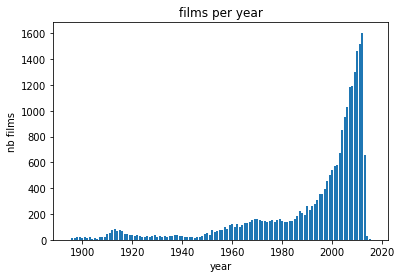

In [ ]:
import matplotlib.pyplot as plt

t = r.collect()

tabYear = [x.production_year for x in t]

tabNb = [x.nb for x in t]

# plt.plot(tabYear, tabNb)
plt.bar(tabYear, tabNb)
plt.xlabel('year')
plt.ylabel('nb films')
plt.title('films per year')
plt.show()

### Les types de films : fichier kind_type

In [ ]:
kind_type.printSchema()


root
 |-- id: integer (nullable = true)
 |-- kind: string (nullable = true)



In [ ]:
spark.sql("SELECT * FROM Kind_type").show()
kind_type.show()

+---+--------------+
| id|          kind|
+---+--------------+
|  1|         movie|
|  2|     tv series|
|  3|      tv movie|
|  4|   video movie|
|  5|tv mini series|
|  6|    video game|
|  7|       episode|
+---+--------------+

+---+--------------+
| id|          kind|
+---+--------------+
|  1|         movie|
|  2|     tv series|
|  3|      tv movie|
|  4|   video movie|
|  5|tv mini series|
|  6|    video game|
|  7|       episode|
+---+--------------+



#### Jointure entre Title et Kind_Type

In [ ]:
title.printSchema()

root
 |-- id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- imdb_index: string (nullable = true)
 |-- kind_id: integer (nullable = true)
 |-- production_year: integer (nullable = true)
 |-- imdb_id: integer (nullable = true)
 |-- phonetic_code: string (nullable = true)
 |-- episode_id: string (nullable = true)
 |-- season_nr: integer (nullable = true)
 |-- episode_nr: integer (nullable = true)
 |-- series_years: string (nullable = true)
 |-- md5sum: string (nullable = true)



In [ ]:

r= spark.sql("""

SELECT k.kind, t.title, t.production_year 
FROM Title t, Kind_Type k 
WHERE t.kind_id = k.id
ORDER BY t.production_year DESC
""")
r.show(10, False)

+---------+-----------------------------------------+---------------+
|kind     |title                                    |production_year|
+---------+-----------------------------------------+---------------+
|movie    |Star Trek 3                              |2016           |
|movie    |Hundred Degrees in the Shade             |2015           |
|movie    |Arclight                                 |2015           |
|movie    |The Bonus Army                           |2015           |
|movie    |The Smoker                               |2015           |
|movie    |3 Solitude                               |2014           |
|movie    |Brothers Day                             |2014           |
|tv series|Witness Protection: Return of the Prophet|2014           |
|movie    |Dead by Dawn                             |2014           |
|movie    |Cockroaches                              |2014           |
+---------+-----------------------------------------+---------------+
only showing top 10 

#### Nombre de films par type

In [ ]:
r= spark.sql("""

SELECT k.kind, count(*) as nb
FROM Title t, Kind_Type k 
WHERE t.kind_id = k.id
GROUP BY k.kind
ORDER BY count(*) DESC
""")
r.show()

+-----------+-----+
|       kind|   nb|
+-----------+-----+
|    episode|15274|
|      movie| 6602|
|video movie| 1175|
|   tv movie|  979|
|  tv series|  925|
| video game|  129|
+-----------+-----+



### Les roles : fichier cast_info

 #### Une personne a un ou plusieurs roles dans un film 

In [ ]:
cast_info.printSchema()

root
 |-- id: integer (nullable = true)
 |-- person_id: integer (nullable = true)
 |-- movie_id: integer (nullable = true)
 |-- person_role_id: integer (nullable = true)
 |-- note: string (nullable = true)
 |-- nr_order: integer (nullable = true)
 |-- role_id: integer (nullable = true)



In [ ]:
cast_info.count()

360035

#### Nombre de roles par acteur

In [ ]:
res2 = spark.sql("""

select person_id, count(*) as nb
from Cast_Info
group by person_id
order by nb desc

""")
res2.persist()
res2.show(5)

+---------+---+
|person_id| nb|
+---------+---+
|   175411|120|
|    95397|118|
|   515315|108|
|  1495180|105|
|   677696| 90|
+---------+---+
only showing top 5 rows



In [ ]:
d = res2.describe('nb')
d.show()

+-------+------------------+
|summary|                nb|
+-------+------------------+
|  count|            214749|
|   mean|1.6765386567574239|
| stddev|1.9565121381308785|
|    min|                 1|
|    max|               120|
+-------+------------------+



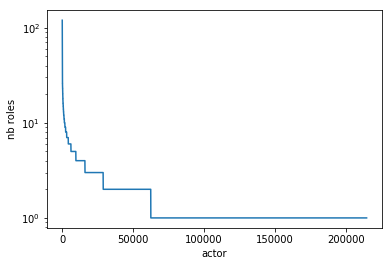

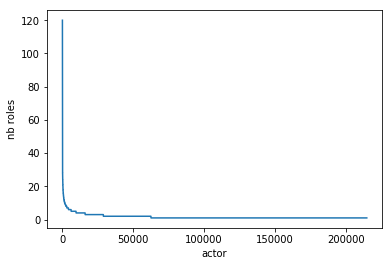

In [ ]:
#t2 = res2.sample(0.01).collect()
t2 = res2.collect()

tabNb = [x.nb for x in t2]

plt.yscale('log')
plt.plot(tabNb) 
plt.xlabel('actor')
plt.ylabel('nb roles')

#plt.hist(tabNb)
plt.show()

plt.yscale('linear')
plt.plot(tabNb) 
plt.xlabel('actor')
plt.ylabel('nb roles')

plt.show()

#### Le nombre de rôles par type de film

In [ ]:
res3 = spark.sql("""
SELECT g.kind, count(*) as nb_roles
FROM Cast_Info c, Title f, Kind_type g
WHERE c.movie_id = f.id AND f.kind_id = g.id
AND f.production_year > 2010
GROUP BY g.kind
ORDER BY nb_roles desc
""")
res3.show(5)

+-----------+--------+
|       kind|nb_roles|
+-----------+--------+
|    episode|   36527|
|      movie|   15897|
|   tv movie|    1842|
|video movie|    1421|
|  tv series|     943|
+-----------+--------+
only showing top 5 rows



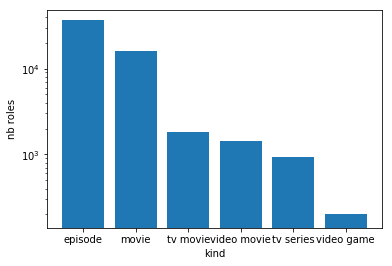

In [ ]:
t3 = res3.collect()

tabNb = [x.nb_roles for x in t3]
tabKind = [x.kind for x in t3]

plt.yscale('log')
plt.bar(tabKind,tabNb) 
plt.xlabel('kind')
plt.ylabel('nb roles')

#plt.hist(tabNb)

plt.show()

## Autres analyses

etude sur les saison a traver le temp

In [ ]:
#on recupere pour chaque serie la derniere saison existante et lannee de production de la serie 
r = spark.sql(""" 
SELECT title,max(production_year)as production_year,max(season_nr) as last_saison,max(episode_nr) as last_episode
FROM Title 
where production_year is not null and episode_nr>1
group by title
""")
#r.show(5,False)
r.count()
#on remplace la premiere table par celle sans doublon
r.createOrReplaceTempView("Title_uniques")

In [ ]:
r=spark.sql("""select * from title_uniques""")
r.show()

+--------------------+---------------+-----------+------------+
|               title|production_year|last_saison|last_episode|
+--------------------+---------------+-----------+------------+
|              (#1.6)|           2013|          1|           6|
|                 DNA|           2010|          1|          13|
|             (#2.40)|           2008|          2|          40|
|       Travel Writer|           2004|          3|           5|
|             (#1.69)|           2007|          1|          69|
|         Nya grannen|           1999|          2|           7|
|            Philippe|           2013|          3|          66|
|     Orlando: Hour 1|           2008|         12|           4|
|             (#1.54)|           2009|          1|          54|
|          (#1.13839)|           2010|          1|       13839|
|   The Fifth of July|           1982|          1|           9|
|       Bighorn Otaku|           2011|          1|           2|
|              (#1.7)|           2013|  

In [ ]:
r = spark.sql(""" 
select production_year, Mean(last_saison) as meanSeas,count(*) as nb From Title_uniques
where last_episode>1

group by production_year
order by production_year desc
""")

r.show(20,False)

+---------------+------------------+---+
|production_year|meanSeas          |nb |
+---------------+------------------+---+
|2013           |4.130081300813008 |246|
|2012           |4.074534161490683 |644|
|2011           |3.909710391822828 |587|
|2010           |3.9367088607594938|553|
|2009           |4.320408163265306 |490|
|2008           |5.098086124401914 |418|
|2007           |4.8094117647058825|425|
|2006           |4.1656441717791415|326|
|2005           |3.848148148148148 |270|
|2004           |4.605150214592275 |233|
|2003           |4.3023255813953485|215|
|2002           |5.204819277108434 |166|
|2001           |5.315476190476191 |168|
|2000           |5.46875           |160|
|1999           |4.382352941176471 |170|
|1998           |5.24113475177305  |141|
|1997           |4.854166666666667 |144|
|1996           |5.909090909090909 |132|
|1995           |3.712871287128713 |101|
|1994           |4.339285714285714 |112|
+---------------+------------------+---+
only showing top

Distribution de la moyenne des  saisons par année

nombre de season qui sortent dans les années

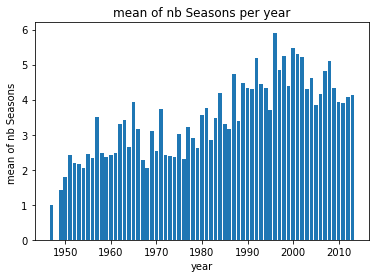

In [ ]:
import matplotlib.pyplot as plt

t = r.collect()

tabYear = [x.production_year for x in t]

tabNb = [x.meanSeas for x in t]

# plt.plot(tabYear, tabNb)
plt.bar(tabYear, tabNb)
plt.xlabel('year')
plt.ylabel('mean of nb Seasons ')
plt.title('mean of nb Seasons per year')
plt.savefig("/content/gdrive/My Drive/BDLE/meansaisonYear")
plt.show()

la longeur des serie augmente avec les année cela est signe du success des serie de plus en plus

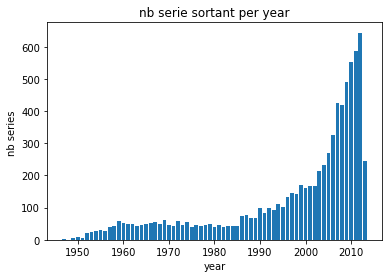

In [ ]:
t = r.collect()

tabYear = [x.production_year for x in t]

tabNb = [x.nb for x in t]

# plt.plot(tabYear, tabNb)
plt.bar(tabYear, tabNb)
plt.xlabel('year')
plt.ylabel('nb series ')
plt.title('nb serie sortant per year')
plt.savefig("/content/gdrive/My Drive/BDLE/nbsaisonYear")
plt.show()

le nombre de serie sortant augmente a travers les année cela est signe du success croissant des series

Utilisation de Cube et Aggregation 

####pour chaque annee j'ai combien d'acteur et d'actrice

In [ ]:
#on recupere les film avec les different roles disponibles
role_movie=spark.sql("select distinct role_id,movie_id from cast_info")
role_movie.createOrReplaceTempView("role_movie")

In [ ]:
#on construit un cube pour ventiler sur la dimension temps par rapport au role
personnes=spark.sql("""select t.production_year,rt.role,count(*) as nb from role_movie c1,role_type rt,title t
where t.id=c1.movie_id and c1.role_id=rt.id and t.production_year is not null and (rt.role="actress" or rt.role="actor")
group by CUBE(role,t.production_year)
order by production_year,role
""")
personnes.createOrReplaceTempView("personnes")

In [ ]:
from pyspark.sql import functions as F
#on effectue une transformation les lignes deviennent des collonnes (pivot)
pivoted=personnes.groupBy("production_year","role").pivot("role").agg(F.first("nb")).na.fill(0)
res=pivoted.groupBy("production_year").agg({"actor":"sum" ,"actress":"sum"}).withColumnRenamed("sum(actor)","actor").withColumnRenamed("sum(actress)","actress").orderBy("production_year",ascending=True)

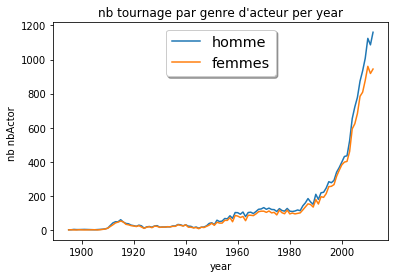

In [ ]:
t = res.collect()

tabYear = [x.production_year for x in t[1:-2]]

tabNbH = [x.actor for x in t[1:-2]]
tabNbF=[x.actress for x in t[1:-2]]
# plt.plot(tabYear, tabNb)
#plt.bar(tabYear, tabNb)
plt.plot(tabYear,tabNbH,label="homme")
plt.plot(tabYear,tabNbF,label="femmes")
plt.xlabel('year')
plt.ylabel('nb nbActor ')
plt.title('nb tournage par genre d\'acteur per year')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')

#plt.savefig("/content/gdrive/My Drive/BDLE/nbsaisonYear")
plt.show()

depuis la derniere decennie les hommes ont connu plus de succes que les femmes dans le cinema ( si l'echantillon est vraiment representatif)

In [ ]:
detail_film = spark.sql("""

select m.info, count(distinct t.id) as nbfilms_sans_doublons, count(t.id) as nbfilms_avec_doublons
from 
Title t, Kind_Type k,  Movie_info m, Info_type i
where t.kind_id = k.id and t.id = m.movie_id and m.info_type_id = i.id
and k.kind = "movie"
and i.info = 'genres'
group by m.info
order by nbfilms_sans_doublons desc
""")

detail_film.show(27)
detail_film.count()

In [ ]:
#on recupere pour chaque serie la derniere saison existante et lannee de production de la serie 
r = spark.sql(""" 
SELECT title,max(production_year)as production_year,max(season_nr) as last_saison
FROM Title 
where production_year is not null
group by title
""")
#r.show(5,False)
r.count()
#on remplace la premiere table par celle sans doublon
r.createOrReplaceTempView("Title_uniques")

In [ ]:
r.show()

+--------------------+---------------+-----------+
|               title|production_year|last_saison|
+--------------------+---------------+-----------+
|Beautiful, Marrie...|           2009|       null|
|              (#1.6)|           2013|          1|
|        (2001-04-26)|           2001|       null|
|        (2010-04-09)|           2010|       null|
|        (2006-05-15)|           2006|       null|
|                 DNA|           2012|          1|
|                Baar|           2004|       null|
|De moord van Lied...|           1966|       null|
|             (#2.40)|           2008|          2|
|        (2000-06-30)|           2000|       null|
|       Travel Writer|           2004|          3|
|             (#1.69)|           2007|          1|
|         Nya grannen|           1999|          2|
|     Baywatch Nights|           1995|       null|
|        (1993-01-15)|           1993|       null|
|            Philippe|           2013|          3|
|        (2009-06-11)|         

#### La liste des pays ou un film a été tourné

In [ ]:
#sortir les country de chaque film
r1 = spark.sql("""
  select distinct m.movie_id,m.info
  from movie_info m,info_type i
  where i.id = m.info_type_id and i.info = "countries"
""")

r1.createOrReplaceTempView("r1")

r1.show()

In [ ]:
r2 = spark.sql("""
  select distinct m.info ,count(*) as nb
  from movie_info m, info_type i
  where m.info_type_id=i.id and i.info = "countries"
  group by m.info
  order by nb desc
""")
#136 = count
r2.createOrReplaceTempView("r2")

r2.show(10,False)

In [ ]:
t = r.collect()
countries = [x.info for x in t]
nbFilm = [x.nb for x in t]
import pandas as pd
tmp = {"countrie":countries,"nbFilm":nbFilm}
df_NbFilmCountries = pd.DataFrame(tmp)
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

In [ ]:
df_NbFilmCountries.to_csv("/content/gdrive/My Drive/is/location_films.csv")

In [ ]:
import matplotlib.pyplot as plt

t = r.collect()
t = t[:10]

countries = [x.info for x in t]
nbFilm = [x.nb for x in t]



plt.bar(countries, nbFilm)
plt.xlabel('Countries')
plt.ylabel('nb films')
plt.title('films per countries')
plt.show()

#### comparaison pays genre decomposition temporelle

In [ ]:
#try to add countries
#nb movie pr genre

movies_infos = spark.sql("""

  select distinct m.movie_id, m.info as genre, t.production_year, m2.info as country
  from 
  Title t, Kind_Type k,  Movie_info m, Info_type i , Movie_info m2, info_type i2
  where t.id = m.movie_id and t.kind_id = k.id and  m.info_type_id = i.id
   and m2.movie_id = t.id and m2.info_type_id = i2.id and i2.info="countries"
  and i.info = "genres"
  and k.kind = "movie"
""")
#les pays ayant 

#movies_infos.createOrReplaceTempView("movies_infos")



movies_infos.show(6)
movies_infos.count()





+--------+-------+---------------+-----------+
|movie_id|  genre|production_year|    country|
+--------+-------+---------------+-----------+
| 1633601|  Drama|           2011|        USA|
| 1633601|Fantasy|           2011|        USA|
| 1633601|  Short|           2011|        USA|
| 1636236|  Drama|           2003|Netherlands|
| 1640259| Action|           1998|        USA|
| 1640259| Comedy|           1998|        USA|
+--------+-------+---------------+-----------+
only showing top 6 rows



11922

In [ ]:
from pyspark.sql.functions import udf 
from pyspark.sql.types import StringType 
from pyspark.sql.types import IntegerType 
# de la merde 
def get_mill(annee):   
  annee=str(annee)   
  return annee[0] 
def get_siecle(annee):   
  annee=str(annee)   
  return annee[1]
def get_decenie(annee):   
  annee=str(annee)   
  return annee[2]
def get_numanne(annee):   
  annee=str(annee)   
  return annee[3]

In [ ]:

func_udf = udf(get_mill, StringType())
s = movies_infos.withColumn('millenaire',func_udf(movies_infos.production_year))


func_udf2 = udf(get_siecle, StringType())
s1 =s.withColumn("ciecle",func_udf2(s.production_year))

func_udf3 = udf(get_decenie, StringType())
s2 = s1.withColumn('decenie',func_udf3(s1.production_year) ) 

func_udf4 = udf(get_numanne, StringType())
s3 =s2.withColumn("annee",func_udf4(s2.production_year) )

In [ ]:
s3.createOrReplaceTempView("movies_infos")

In [ ]:
#select movie_id, genre , production_year, country ,count(*) as nb
  
r = spark.sql("""
  select millenaire,ciecle,decenie,country,genre,count(*) as nb
  from movies_infos
  group by ROLLUP(millenaire,ciecle,decenie),country,genre
  order by country,millenaire,ciecle,decenie,genre
  """)
# 
 
#order by movie_id, genre, production_year,country

r.show(10)
r.count()
r.createOrReplaceTempView("movies_infos")

+----------+------+-------+-------+-----+----+
|millenaire|ciecle|decenie|country|genre|  nb|
+----------+------+-------+-------+-----+----+
|      null|  null|   null|   null| null|   1|
|      null|  null|   null|   null| null|3296|
|      null|  null|   null|   null| null|   1|
|      null|  null|   null|   null| null|   1|
|      null|  null|   null|   null| null|   1|
|      null|  null|   null|   null| null|   1|
|         1|  null|   null|   null| null|   1|
|         1|  null|   null|   null| null|   1|
|         1|  null|   null|   null| null|   1|
|         1|  null|   null|   null| null|1891|
+----------+------+-------+-------+-----+----+
only showing top 10 rows



In [ ]:
r.createOrReplaceTempView("genres_country")

In [ ]:
r = spark.sql("""
  select * 
  from movies_infos
  where ( country is not null ) and (genre is not null) and millenaire=2
  """) 
 

In [ ]:
r.createOrReplaceTempView("resultat_cleaned")

In [ ]:
#items = ["France", "Canda", "Spain" , "UK"]

res_comedy=spark.sql("""select * from resultat_cleaned
  where genre='Comedy' """).filter('country in ("France", "Canada", "Spain" , "UK", "Italy","Germany")')

In [ ]:
t = res.collect()



In [ ]:
histo_x={}
for i in t:
  if( i.country not in histo_x.keys()):
  #if ( len(histo_x[i.country])==0 ):
    histo_x[i.country]=[i.nb]
  else:
    histo_x[i.country].append(i.nb)

Text(0.5, 1.0, 'Comparaison du genre Comedy par decenie et pays')

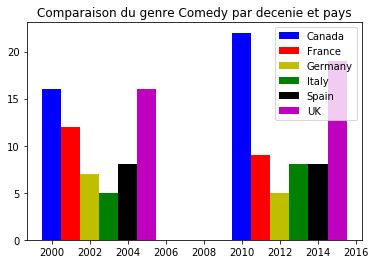

In [ ]:
color=["b","r","y","g","k","m"]
decenie=np.array([2000,2010])
c=0
for i in histo_x.keys():
  plt.bar(decenie+c,histo_x[i], width=1, color=color[c], align='center',label=i)
  c+=1
plt.legend()
plt.title("Comparaison du genre Comedy par decenie et pays")

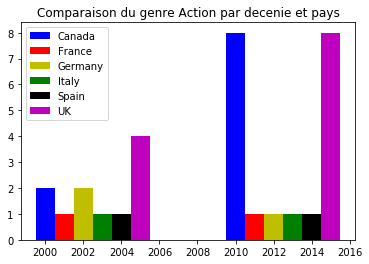

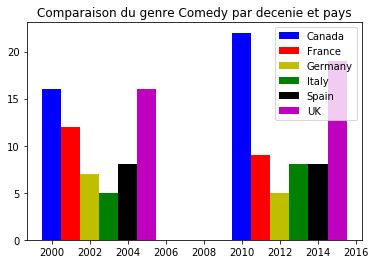

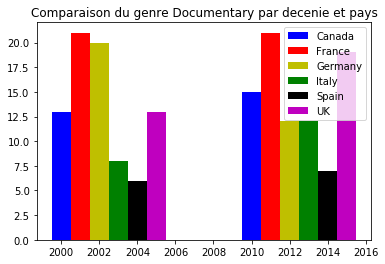

In [ ]:
genres = ["Action","Comedy","Documentary"]

for genre in genres:  
  res=spark.sql("""select * from resultat_cleaned
  where genre='"""+genre+"""' """).filter('country in ("France", "Canada", "Spain" , "UK", "Italy","Germany")')
  t = res.collect()
  histo_x={}
  for i in t:
    if( i.country not in histo_x.keys()):
    #if ( len(histo_x[i.country])==0 ):
      histo_x[i.country]=[i.nb]
    else:
      histo_x[i.country].append(i.nb)

  color=["b","r","y","g","k","m"]
  decenie=np.array([2000,2010])
  c=0
  for i in histo_x.keys():
    plt.bar(decenie+c,histo_x[i], width=1, color=color[c], align='center',label=i)
    c+=1
  plt.legend()
  plt.title("Comparaison du genre "+genre+" par decenie et pays")
  plt.show()


#### Fenetres

In [ ]:
r2 = spark.sql("""
  select distinct m.info ,count(*) as nb
  from movie_info m, info_type i
  where m.info_type_id=i.id and i.info = "countries"
  group by m.info
  order by nb desc
""")
#136 = count
r2.createOrReplaceTempView("r2")

r2.show(10,False)

+---------+----+
|info     |nb  |
+---------+----+
|USA      |5380|
|UK       |1190|
|France   |615 |
|Japan    |516 |
|Germany  |508 |
|Spain    |474 |
|Canada   |450 |
|Australia|350 |
|Italy    |339 |
|India    |275 |
+---------+----+
only showing top 10 rows



In [ ]:
#try to add countries
#nb movie pr genre

movies_infos = spark.sql("""

  select distinct m.movie_id, m.info as genre, t.production_year, m2.info as country
  from 
  Title t, Kind_Type k,  Movie_info m, Info_type i , Movie_info m2, info_type i2
  where t.id = m.movie_id and t.kind_id = k.id and  m.info_type_id = i.id
   and m2.movie_id = t.id and m2.info_type_id = i2.id and i2.info="countries"
  and i.info = "genres"
  and k.kind = "movie"
""")
#les pays ayant 

movies_infos.createOrReplaceTempView("movies_infos")



movies_infos.show(6)
movies_infos.count()

+--------+-------+---------------+-----------+
|movie_id|  genre|production_year|    country|
+--------+-------+---------------+-----------+
| 1633601|  Drama|           2011|        USA|
| 1633601|Fantasy|           2011|        USA|
| 1633601|  Short|           2011|        USA|
| 1636236|  Drama|           2003|Netherlands|
| 1640259| Action|           1998|        USA|
| 1640259| Comedy|           1998|        USA|
+--------+-------+---------------+-----------+
only showing top 6 rows



11922

In [ ]:
nbFilmPerCountry = spark.sql("""
  select mi.country,mi.production_year,count (*) as nbFilm
  from movies_infos mi
  group by mi.country,mi.production_year
  order by production_year desc
""")

nbFilmPerCountry.createOrReplaceTempView("nbFilmPerCountry")
nbFilmPerCountry.show(5)


+-------+---------------+------+
|country|production_year|nbFilm|
+-------+---------------+------+
|    USA|           2016|     3|
|    USA|           2015|     8|
|     UK|           2014|     6|
|    USA|           2014|    24|
|Finland|           2014|     2|
+-------+---------------+------+
only showing top 5 rows



##### Classement des pays pour chaque année selon le nbr de film produits

In [ ]:


#classement des pays pour chaque année
r = spark.sql("""
  select mi.* , rank() over (partition by production_year order by nbFilm desc) as classement
  from nbFilmPerCountry mi 
  where mi.production_year = 2001
  
""")

r.show(10)


NameError: ignored

#####Cumule du nbr film produit par fenetre pour chaque pays

In [ ]:
#ici on a filtrer sur les USA pour bien observer nos fenetres
r = spark.sql("""
  select mi.* ,
  sum(nbFilm) over (partition by country order by production_year range between 1 preceding and 1 following) as nbFilms
  from nbFilmPerCountry mi
  where mi.production_year > 1950 and mi.country= "USA"
  
""")

r.show(10)

+-------+---------------+------+-------+
|country|production_year|nbFilm|nbFilms|
+-------+---------------+------+-------+
|    USA|           1951|    12|     21|
|    USA|           1952|     9|     30|
|    USA|           1953|     9|     29|
|    USA|           1954|    11|     47|
|    USA|           1955|    27|     41|
|    USA|           1956|     3|     36|
|    USA|           1957|     6|     15|
|    USA|           1958|     6|     24|
|    USA|           1959|    12|     31|
|    USA|           1960|    13|     36|
+-------+---------------+------+-------+
only showing top 10 rows

